In [1]:
import tensorflow as tf
import keras_tuner
import numpy as np
import h5py
import tensorboard

In [2]:
# Get the datasets

def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()
x_train=train_set_x_orig
y_train=train_set_y_orig.reshape(-1,1)
x_test=test_set_x_orig
y_test=test_set_y_orig.reshape(-1,1)

batch_size=32
dataset=tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
eval_dataset=tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [37]:
def define_model(input_shape:tuple=(64,64,3)):
    '''
    Define the deep learning model with 2 hidden layers
    '''
    inputs=tf.keras.Input(shape=input_shape)
    x=tf.keras.layers.Rescaling(1.0/255)(inputs)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model=tf.keras.Model(inputs, outputs)
    model.summary()
    return model


In [60]:
strategy=tf.distribute.MirroredStrategy()
with strategy.scope():
    model=define_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 flatten_9 (Flatten)         (None, 12288)             0         
                                                                 
 dense_25 (Dense)            (None, 128)               1572992   
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                       

In [7]:
epochs=100
batch_size=32

callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath='outputs/model_{epoch}', save_freq='epoch'), tf.keras.callbacks.TensorBoard(log_dir="./logs")]
#history=model.fit(dataset, epochs=epochs, validation_data=eval_dataset, callbacks=callbacks)

In [50]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [51]:
results=model.evaluate(eval_dataset)
results

2/2 [==============================] - 0s 12ms/step - loss: 3.5653 - accuracy: 0.6800


[3.5653438568115234, 0.6800000071525574]

In [52]:
predictions=model.predict(eval_dataset)


2/2 [==============================] - 0s 2ms/step


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

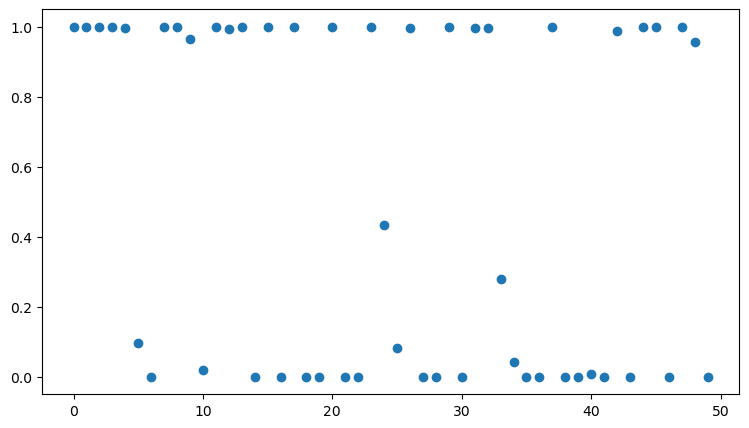

In [59]:
plt.figure(figsize=(9,5))

num_obs=predictions.shape[0]
x=np.arange(num_obs)

plt.scatter(x, predictions)

plt.show()

In [83]:
# Define, train, evaluate a deep learning model for image classification

def get_model(input_shape:tuple=(64,64,3)):
    ''' 
    Define a deap learning model
    '''
    inputs=tf.keras.Input(shape=input_shape)
    x=tf.keras.layers.Rescaling(1.0/255)(inputs)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    x=tf.keras.layers.Dense(64, activation='relu')(x)
    x=tf.keras.layers.Dense(32, activation='relu')(x)
    x=tf.keras.layers.Dense(16, activation='relu')(x)
    x=tf.keras.layers.Dense(8, activation='relu')(x)
    outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model=tf.keras.Model(inputs, outputs)
    model.summary()
    return model

In [84]:
model=get_model()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 rescaling_16 (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 flatten_14 (Flatten)        (None, 12288)             0         
                                                                 
 dense_45 (Dense)            (None, 128)               1572992   
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 16)                528

In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
epochs=200
model.fit(dataset, epochs=epochs)

Epoch 1/200
7/7 [==============================] - 0s 4ms/step - loss: 0.8577 - accuracy: 0.5502
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6593 - accuracy: 0.6555
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6507
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.6555
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.6555
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6555
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6555
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6555
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6555
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.6555
Epoch 11/200
7/7 [===========

In [87]:
results=model.evaluate(eval_dataset)

2/2 [==============================] - 0s 2ms/step - loss: 3.1273 - accuracy: 0.8200


In [73]:
predictions=model.predict(eval_dataset)

2/2 [==============================] - 0s 3ms/step


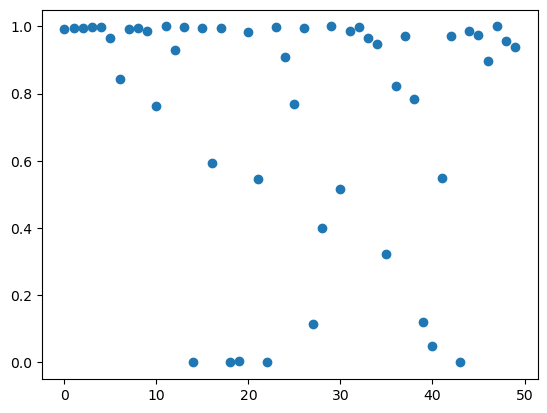

In [74]:
num_obs=predictions.shape[0]
plt.scatter(np.arange(num_obs), predictions)
plt.show()

In [22]:
def build_model(hp):
    ''' 
    Generate a compile deep learning model
    '''
    inputs=tf.keras.Input(shape=(64,64,3))
    x=tf.keras.layers.Rescaling(1.0/255)(inputs)
    x=tf.keras.layers.Flatten()(x)
    for i in range(4):
        x=tf.keras.layers.Dense(units=hp.Int('units'+str(i), min_value=32, max_value=256, step=32), activation='relu')(x)
    outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model=tf.keras.Model(inputs, outputs)
    adam=tf.keras.optimizers.legacy.Adam(hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3,1e-4]))
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [23]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,
    max_retries_per_trial=2,
    directory='outputs/hp_tuner')

In [24]:
tuner.search(dataset, validation_data=eval_dataset)

Trial 100 Complete [00h 00m 00s]
val_loss: 0.9510513544082642

Best val_loss So Far: 0.6722689867019653
Total elapsed time: 00h 00m 49s
INFO:tensorflow:Oracle triggered exit


In [25]:
tuner.results_summary()

Results summary
Results in outputs/hp_tuner/untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 014 summary
Hyperparameters:
units0: 128
units1: 64
units2: 96
units3: 32
learning_rate: 0.0001
Score: 0.6722689867019653

Trial 061 summary
Hyperparameters:
units0: 32
units1: 256
units2: 32
units3: 96
learning_rate: 0.1
Score: 0.6812006235122681

Trial 058 summary
Hyperparameters:
units0: 64
units1: 160
units2: 224
units3: 32
learning_rate: 0.001
Score: 0.6864553689956665

Trial 019 summary
Hyperparameters:
units0: 32
units1: 224
units2: 192
units3: 64
learning_rate: 0.01
Score: 0.695160448551178

Trial 037 summary
Hyperparameters:
units0: 224
units1: 160
units2: 128
units3: 96
learning_rate: 0.1
Score: 0.6976955533027649

Trial 073 summary
Hyperparameters:
units0: 192
units1: 160
units2: 96
units3: 96
learning_rate: 0.0001
Score: 0.704602062702179

Trial 068 summary
Hyperparameters:
units0: 128
units1: 256
units2: 256
units3: 32
learning_rate: 0.001


In [26]:
best_model = tuner.get_best_models()[0]
evals=best_model.evaluate(eval_dataset)
evals

2/2 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6000


[0.6722689867019653, 0.6000000238418579]

In [31]:
def build_model(hp):
    ''' 
    Generate a compile deep learning model
    '''
    inputs=tf.keras.Input(shape=(64,64,3))
    x=tf.keras.layers.Rescaling(1.0/255)(inputs)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(256, activation='relu')(x)
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    x=tf.keras.layers.Dense(64, activation='relu')(x)
    x=tf.keras.layers.Dense(32, activation='relu')(x)
    x=tf.keras.layers.Dense(16, activation='relu')(x)
    x=tf.keras.layers.Dense(8, activation='relu')(x)
    outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model=tf.keras.Model(inputs, outputs)
    adam=tf.keras.optimizers.legacy.Adam(hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3,1e-4, 1e-5]))
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [32]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=200,
    max_retries_per_trial=2,
    directory='outputs/hp_tuner')

INFO:tensorflow:Reloading Tuner from outputs/hp_tuner/untitled_project/tuner0.json


In [33]:
tuner.search(dataset, validation_data=eval_dataset)

Trial 200 Complete [00h 00m 01s]
val_loss: 1.2917261123657227

Best val_loss So Far: 0.6545006632804871
Total elapsed time: 00h 01m 04s
INFO:tensorflow:Oracle triggered exit


In [35]:
tuner.results_summary()

Results summary
Results in outputs/hp_tuner/untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 158 summary
Hyperparameters:
units0: 32
units1: 32
units2: 64
units3: 160
learning_rate: 0.1
Score: 0.6545006632804871

Trial 173 summary
Hyperparameters:
units0: 192
units1: 32
units2: 192
units3: 224
learning_rate: 0.001
Score: 0.659095287322998

Trial 192 summary
Hyperparameters:
units0: 192
units1: 64
units2: 160
units3: 160
learning_rate: 0.1
Score: 0.6601036190986633

Trial 112 summary
Hyperparameters:
units0: 32
units1: 160
units2: 64
units3: 256
learning_rate: 0.1
Score: 0.6629336476325989

Trial 185 summary
Hyperparameters:
units0: 64
units1: 192
units2: 96
units3: 64
learning_rate: 0.1
Score: 0.665473461151123

Trial 168 summary
Hyperparameters:
units0: 64
units1: 192
units2: 256
units3: 32
learning_rate: 0.1
Score: 0.6678012609481812

Trial 014 summary
Hyperparameters:
units0: 128
units1: 64
units2: 96
units3: 32
learning_rate: 0.0001
Score: 

In [36]:
best_model=tuner.get_best_models()[0]

evals=best_model.evaluate(eval_dataset)
evals

2/2 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6600


[0.6545006632804871, 0.6600000262260437]